In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron

from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
# Let's understand our dataset first , what it's ->
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# so label=1 matlab 1 picture h uski pixels me kya kya value h vo pura row bata ra hai so let's see how many total images do we have here
df.shape

(42000, 785)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [7]:
# the data is already cleaned and all let's start our model prep->

In [8]:
X_train = df.drop('label', axis=1).values
y_train = df['label'].values

#.values krdiya ki bhai kaam thoda ez krdiya abhi hi sab array me convert rdiya taaki intenrally they wont have to convert
# also df_test.drop['label'] not needed bcs it doesnt has any label colm it's just inputs data.
X_test = df_test.values

In [9]:
#since saari value 0 to 255 h , we know having data b/w 0 to 1 best so ->
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [10]:
X_train_img = X_train.reshape(-1,28,28)
X_test_img = X_test.reshape(-1,28,28)
# since we have 784 colms(i/p) so it's 28*28 and -1 is kept so comp itself does the math and find out homw many actually images are tehre that he needs to save for

In [11]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
X_train_img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [13]:
# hence converted 2DArray to 3DArray
# ANN/MLP: These require the "flat" X_train. They can't handle 2D shapes; they just want one long list of inputs.
# CNN: These are the "Kings of Computer Vision." They require the 2D X_train_img shape.

In [14]:
# The magic of using -1. It isn't a fixed number; it is a variable that adjusts based on which dataset you are currently looking at.

# How -1 changes for each dataset

# When you run the command reshape(-1, 28, 28), NumPy looks at the total size of the array you are giving it at that exact moment.

# 1. For your Training Data (X_train)

# Total pixels: 42,000×784=32,928,000.

# The Math: NumPy divides 32,928,000 by (28×28).

# The Result: In this case, -1 becomes 42,000.

# 2. For your Test Data (X_test)

# If you downloaded the standard Kaggle "Digit Recognizer" test set, it usually has 28,000 rows.

# Total pixels: 28,000×784=21,952,000.

# The Math: NumPy divides 21,952,000 by (28×28).

# The Result: In this case, the exact same code -1 becomes 28,000.

In [15]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [16]:
# ab krenge one-hot encoding to the categorical data
y_train_cat = to_categorical(y_train, num_classes=10)

In [17]:
# to ab pehle perceptron ka smjhte h kese kya hoga->

perceptron = Sequential([
    #input layer
    Flatten(input_shape=(28,28)),
    #output layer hai and since it's the multi actegorical hence activation is softmax
    Dense(10, activation='softmax')
]
)

In [18]:
perceptron.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = perceptron.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7700 - loss: 0.8888 - val_accuracy: 0.9055 - val_loss: 0.3515
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9071 - loss: 0.3375 - val_accuracy: 0.9137 - val_loss: 0.3127
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9138 - loss: 0.3058 - val_accuracy: 0.9210 - val_loss: 0.2927
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9190 - loss: 0.2866 - val_accuracy: 0.9236 - val_loss: 0.2841
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9232 - loss: 0.2741 - val_accuracy: 0.9213 - val_loss: 0.2816


In [22]:
results = perceptron.evaluate(X_train_img, y_train_cat)
print(f"Final Accuracy: {results[1]}%")

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9272 - loss: 0.2593
Final Accuracy: 0.9250476360321045%


In [20]:
# This gives you probabilities for all 10 classes for each of the 28,000 images
raw_predictions = perceptron.predict(X_test_img)

# We want the class with the HIGHEST probability (the actual digit)
# np.argmax converts [0.1, 0.0, 0.8...] into the index '2'
final_predictions = np.argmax(raw_predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
# Create the DataFrame
submission = pd.DataFrame({
    "ImageId": range(1, len(final_predictions) + 1),
    "Label": final_predictions
})

# Save it as a CSV (index=False is crucial, otherwise you get an extra column)
submission.to_csv("submission.csv", index=False)

In [23]:
# ANN
ann = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [24]:
ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
ann.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8377 - loss: 0.5427 - val_accuracy: 0.9481 - val_loss: 0.1716
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9591 - loss: 0.1376 - val_accuracy: 0.9607 - val_loss: 0.1246
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9751 - loss: 0.0816 - val_accuracy: 0.9710 - val_loss: 0.0905
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9830 - loss: 0.0566 - val_accuracy: 0.9683 - val_loss: 0.1013
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9871 - loss: 0.0422 - val_accuracy: 0.9702 - val_loss: 0.1007


In [26]:
results = ann.evaluate(X_train_img, y_train_cat)
print(f"Final Accuracy: {results[1]}%")

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9901 - loss: 0.0310
Final Accuracy: 0.9859285950660706%


In [27]:
raw_predictions = ann.predict(X_test_img)

final_predictions = np.argmax(raw_predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [28]:
submission = pd.DataFrame({
    "ImageId": range(1, len(final_predictions) + 1),
    "Label": final_predictions
})

submission.to_csv("submission_ann.csv", index=False)

In [29]:
# You must use .reshape(-1, 28, 28, 1) only when you move up to Conv2D layers.

# Conv2D layers are designed to process "volumes."

# They expect: (Batch, Height, Width, Channels).

# Even if there is only 1 channel (Black & White), the layer is hard-coded to look for that 4th number.
# If it’s missing, Keras will throw a ValueError saying it expected 4 dimensions but got 3.

In [30]:
X_train_img_cnn = X_train_img.reshape(-1,28,28,1)
X_test_img_cnn = X_test_img.reshape(-1,28,28,1)

In [31]:
#CNN
cnn = Sequential([

    #kernel size = filters
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), #iske vajese 50% deactivate hojayejnge to vo random hoga to har baar ka new learning hoga and best learning krenge saare perceptron apne.
    Dense(10, activation='softmax')
])

In [32]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history1 = cnn.fit(X_train_img_cnn, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.8197 - loss: 0.5572 - val_accuracy: 0.9789 - val_loss: 0.0662
Epoch 2/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.9679 - loss: 0.1093 - val_accuracy: 0.9829 - val_loss: 0.0559
Epoch 3/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.9785 - loss: 0.0751 - val_accuracy: 0.9869 - val_loss: 0.0381
Epoch 4/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9808 - loss: 0.0620 - val_accuracy: 0.9864 - val_loss: 0.0425
Epoch 5/5
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 30s 28ms/step - accuracy: 0.9847 - loss: 0.0496 - val_accuracy: 0.9870 - val_loss: 0.0432


In [35]:
esults = cnn.evaluate(X_train_img_cnn, y_train_cat)
print(f"Final Accuracy: {results[1]}%")

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9935 - loss: 0.0203
Final Accuracy: 0.9859285950660706%


In [36]:
raw_predictions = cnn.predict(X_test_img)
final_predictions = np.argmax(raw_predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step


In [37]:
submission = pd.DataFrame({
    "ImageId": range(1, len(final_predictions) + 1),
    "Label": final_predictions
})

submission.to_csv("submission_cnn.csv", index=False)

In [39]:
def show_side_by_side(models, model_names, X, X_cnn, y_true, n=5):
    idxs = np.random.choice(len(X), n, replace=False)
    plt.figure(figsize=(15, 6))
    for i, idx in enumerate(idxs):
        plt.subplot(2, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"True: {y_true[idx]}")
        preds = [np.argmax(model.predict(X_cnn[idx].reshape(1, 28, 28, 1) if name == "CNN" else X[idx].reshape(1, 28, 28)))
                 for model, name in zip(models, model_names)]
        plt.subplot(2, n, n+i+1)
        plt.axis("off")
        plt.title("\n".join(f"{n}: {p}" for n, p in zip(model_names, preds)))
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


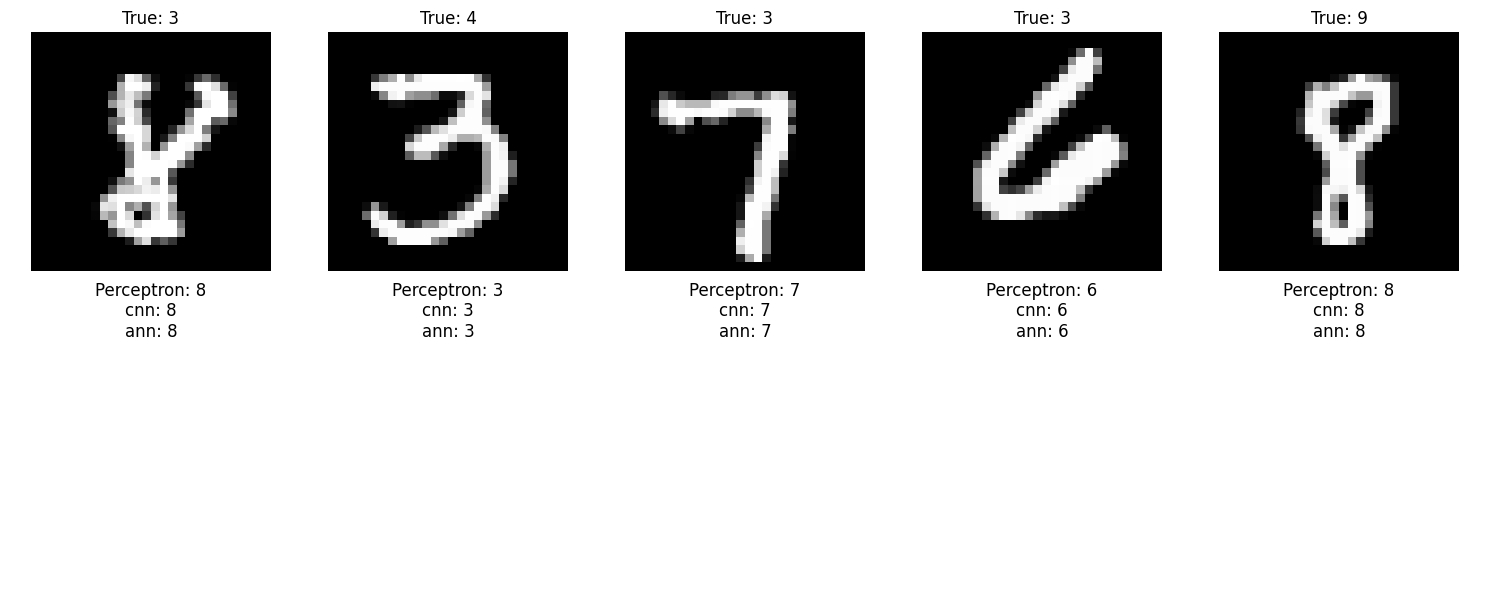

In [43]:
show_side_by_side([perceptron, cnn, ann], ["Perceptron", "cnn", "ann"],
                  X_test_img, X_test_img_cnn, y_train, 5)